In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as dates
import pytz
import re
import numpy as np
from datetime import datetime
%matplotlib inline


In [2]:
def convToInt(val):
    result = re.sub('\D+', '' , val)
    if result:
        return int(result)
    else:
        return 0

def parse_datetime(x):
    return datetime.strptime(x[1:-3], '%d/%b/%Y:%H:%M')
    
def tratarURI(val):
    result = re.sub('\?.+$', '' , val)
    return result

def convertbytetoMbyte(val):
    return ((val/1024)/1024)

In [3]:
COLUMNS = ['host','datatime', 'metodo', 'uri', 'status', 'bytes']

dadosAccesslog = pd.read_csv('dataset/access_log.log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 5, 6, 8, 9],
                   names=COLUMNS,
                   converters={
                            'status': convToInt,
                            'bytes': convToInt,
                            'datatime':parse_datetime}
                   )

dadosAccesslog['uri'] = [tratarURI(x) for x in dadosAccesslog['uri'].values]
dadosAccesslog = dadosAccesslog.set_index('datatime')
dadosAccesslog = dadosAccesslog.sort_values(by='datatime')
dadosAccesslog['Mbytes'] = [convertbytetoMbyte(x) for x in dadosAccesslog['bytes'].values]
print(type(dadosAccesslog.index[0]))
dadosAccesslog.head()


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,host,metodo,uri,status,bytes,Mbytes
datatime,,,,,,
2018-11-29 08:18:00,10.3.19.90,"""GET",/mv/flex/AppRunner.html,302,0,0.000000
2018-11-29 08:18:00,10.1.235.70,"""GET",/mv/secure/receptor,200,0,0.000000
2018-11-29 08:18:00,10.1.235.70,"""GET",/mv/secure/receptor,200,98,0.000093
2018-11-29 08:18:00,10.3.19.90,"""GET",/mv/flex/AppRunner.html,302,0,0.000000
2018-11-29 08:18:00,10.3.19.90,"""GET",/mv/flex/AppRunner.html,200,19325,0.018430


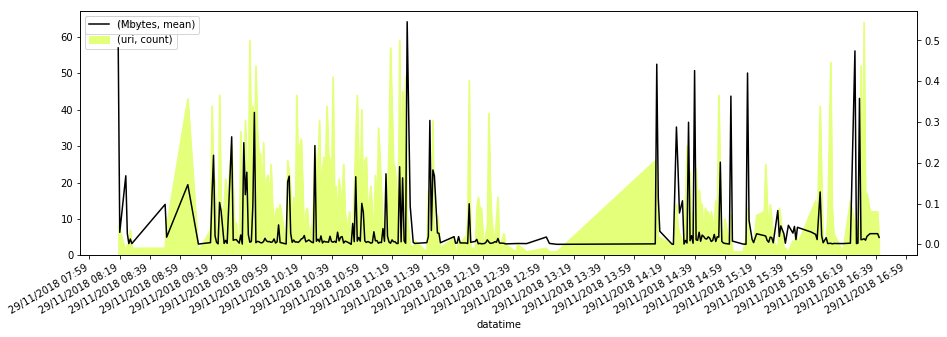

In [22]:
grb = dadosAccesslog.groupby([dadosAccesslog.index]).agg({
    'uri': ['count'],
    'Mbytes': [np.mean]
})
grb[('uri','count')].plot.area(figsize=(15, 5), colormap='Wistia').legend(loc='upper left')
grb[('Mbytes','mean')].plot(figsize=(15, 5),secondary_y=True, colormap='copper').legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d/%m/%Y %H:%M'))
plt.xticks(size='small',rotation=45, ha="right")
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(byminute=None, interval=20))

In [23]:
grbStatus = dadosAccesslog.groupby([dadosAccesslog['status']]).agg({
    'status': ['count']
})


grbStatus

,status
,count
status,
0,15
200,3747
202,8
206,7
302,143
304,100
403,3
404,20


In [ ]:

# Define a variable N
N = 500


flatui = ["#31af3e", "#e7f006", "#fa1d08"]


# Construct the colormap
current_palette = sns.color_palette(flatui)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

# Initialize the data
data1 = np.random.randn(N)
data2 = np.random.randn(N)
# Assume that there are 5 possible labels
colors = np.random.randint(0,5,N)

# Create a scatter plot
plt.scatter(data1, data2, c=colors, cmap=cmap)

# Add a color bar
plt.colorbar()

# Show the plot
plt.show()
